In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Variance Thresholding

In [2]:
boston = pd.read_csv('data/boston.csv')
print(boston.shape)

(506, 13)


In [3]:
boston.head()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
X = boston.drop(columns='Median Home Value')
y = boston['Median Home Value']

In [5]:
X.var(axis=0)

crime rate                            73.986578
residential land zone                543.936814
business acres                        47.064442
Charles River                          0.064513
nitric oxides                          0.013428
number of rooms                        0.493671
age                                  792.358399
distances to employment centres        4.434015
accessibility to highways             75.816366
property-tax                       28404.759488
pupil-teacher ratio                    4.686989
lower income levels                   50.994760
dtype: float64

In [6]:
from sklearn.feature_selection import VarianceThreshold
select_features = VarianceThreshold(threshold=8.0) # Scaling before applying feature selection can also be done

In [7]:
X_new = select_features.fit_transform(X)

In [8]:
X_new.shape

(506, 7)

In [9]:
select_features.get_support()

array([ True,  True,  True, False, False, False,  True, False,  True,
        True, False,  True])

In [10]:
X_new = pd.DataFrame(X_new, columns=X.columns[select_features.get_support()])
X_new.head()

,crime rate,residential land zone,business acres,age,accessibility to highways,property-tax,lower income levels
0,0.00632,18.0,2.31,65.2,1.0,296.0,4.98
1,0.02731,0.0,7.07,78.9,2.0,242.0,9.14
2,0.02729,0.0,7.07,61.1,2.0,242.0,4.03
3,0.03237,0.0,2.18,45.8,3.0,222.0,2.94
4,0.06905,0.0,2.18,54.2,3.0,222.0,5.33


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 7), (102, 7), (404,), (102,))

In [12]:
X_train_with_intercept = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_intercept)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Median Home Value   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     93.23
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           9.53e-80
Time:                        16:44:05   Log-Likelihood:                -1274.3
No. Observations:                 404   AIC:                             2565.
Df Residuals:                     396   BIC:                             2597.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        33.7357      1.319     25.574      0.000      31.142      36.329
crime rate                   -0.0704      0.046     -1.516      0.130      -0.162       0.021
residential land zone         0.0717      0.016      4.536      0.000       0.041       0.103
business acres                0.0168      0.074      0.228      0.820      -0.128       0.162
age                           0.0717      0.015      4.733      0.000       0.042       0.101
accessibility to highways     0.2468      0.085      2.897      0.004       0.079       0.414
property-tax                 -0.0195      0.005     -3.968      0.000      -0.029      -0.010
lower income levels          -0.8925      0.055    -16.128      0.000      -1.001      -0.784
==============================================================================
Omnibus:                      102.728   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.253
Skew:                           1.344   Prob(JB):                     8.12e-47
Kurtosis:                       5.320   Cond. No.                     2.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
lr = LinearRegression().fit(X_train, y_train)
print(f'Training R-squared: {lr.score(X_train, y_train):.2f}')
print(f'Testing R-squared: {lr.score(X_test, y_test):.2f}')

Training R-squared: 0.62
Testing R-squared: 0.44


# Univariate Statistics

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

In [15]:
diabetes = pd.read_csv('data/diabetes.csv')
print(diabetes.shape)

(768, 9)


In [16]:
diabetes.head()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,Mass,Pedigree,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
X = diabetes.drop(columns='class')
y = diabetes['class']

In [18]:
X = X.astype('float64')

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     768 non-null    float64
 1   Glucose         768 non-null    float64
 2   BP              768 non-null    float64
 3   Skin Thickness  768 non-null    float64
 4   Insulin         768 non-null    float64
 5   Mass            768 non-null    float64
 6   Pedigree        768 non-null    float64
 7   Age             768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


In [20]:
from sklearn.feature_selection import chi2, SelectKBest
select_features = SelectKBest(chi2, k=3)
X_new = select_features.fit_transform(X, y)

In [21]:
X_new = pd.DataFrame(X_new, columns=X.columns[select_features.get_support()])
X_new.head()

,Glucose,Insulin,Age
0,148.0,0.0,50.0
1,85.0,0.0,31.0
2,183.0,0.0,32.0
3,89.0,94.0,21.0
4,137.0,168.0,33.0


In [22]:
FEATURES = list(X.columns)
FEATURES

['Pregnancies',
 'Glucose',
 'BP',
 'Skin Thickness',
 'Insulin',
 'Mass',
 'Pedigree',
 'Age']

In [23]:
def build_model(target,
                    features,
                    dataset,
                    preprocess_fn,
                    *hyperparameters):

    X = dataset[features]
    y = dataset[target]
    X = preprocess_fn(X, y, *hyperparameters)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model = logistic_fn(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1
    }

In [24]:
def compare_results(results):
    for key in results:
        print(f'Test: {key}')

        print()
        print(f'Accuracy: {results[key]["accuracy"]:.2f}')
        print(f'Precision: {results[key]["precision"]:.2f}')
        print(f'Recall: {results[key]["recall"]:.2f}')
        print(f'F1: {results[key]["f1"]:.2f}')
        print()

In [42]:
def visualize_results_kbest(results, metric):

    n_components = list(range(1, 9))
    f1 = [results[key][metric] for key in results]

    plt.figure(figsize=(12, 10))
    plt.plot(n_components, f1, '-o')
    plt.ylim([0, 1])
    plt.xlabel('Number of components')
    plt.ylabel(metric)
    plt.show();

In [35]:
def logistic_fn(X_train, y_train):
    model = LogisticRegression(solver='liblinear', random_state=0)
    model.fit(X_train, y_train)
    return model

In [36]:
def apply_chi2(x, y, k):
    select_features = SelectKBest(chi2, k=k)
    X_new = select_features.fit_transform(x, y)
    return pd.DataFrame(X_new, columns=x.columns[select_features.get_support()])

In [37]:
result_dict = {}

for i in range(1, 9):
    result_dict['chi2_' + str(i)] = build_model('class', FEATURES, diabetes, apply_chi2, i)

In [38]:
compare_results(result_dict)

Test: chi2_1

Accuracy: 0.71
Precision: 0.75
Recall: 0.06
F1: 0.12

Test: chi2_2

Accuracy: 0.79
Precision: 0.69
Recall: 0.53
F1: 0.60

Test: chi2_3

Accuracy: 0.76
Precision: 0.64
Recall: 0.49
F1: 0.55

Test: chi2_4

Accuracy: 0.81
Precision: 0.74
Recall: 0.55
F1: 0.63

Test: chi2_5

Accuracy: 0.80
Precision: 0.71
Recall: 0.57
F1: 0.64

Test: chi2_6

Accuracy: 0.80
Precision: 0.71
Recall: 0.57
F1: 0.64

Test: chi2_7

Accuracy: 0.81
Precision: 0.74
Recall: 0.60
F1: 0.66

Test: chi2_8

Accuracy: 0.82
Precision: 0.76
Recall: 0.60
F1: 0.67



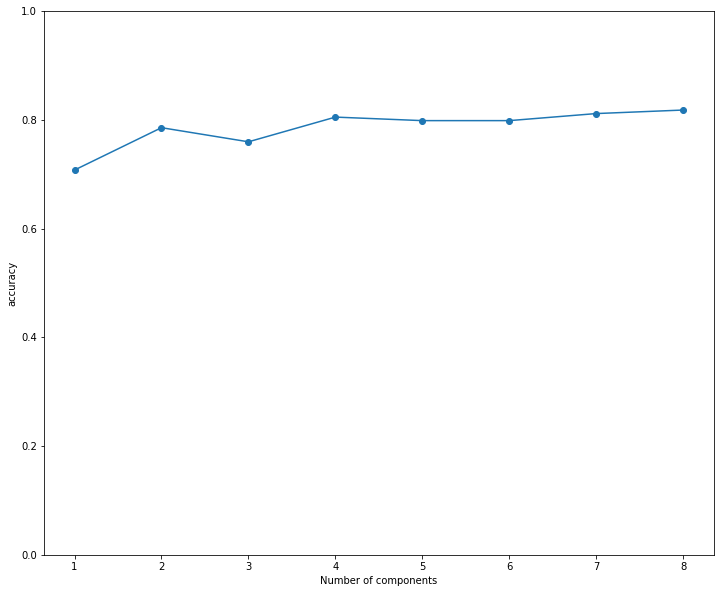

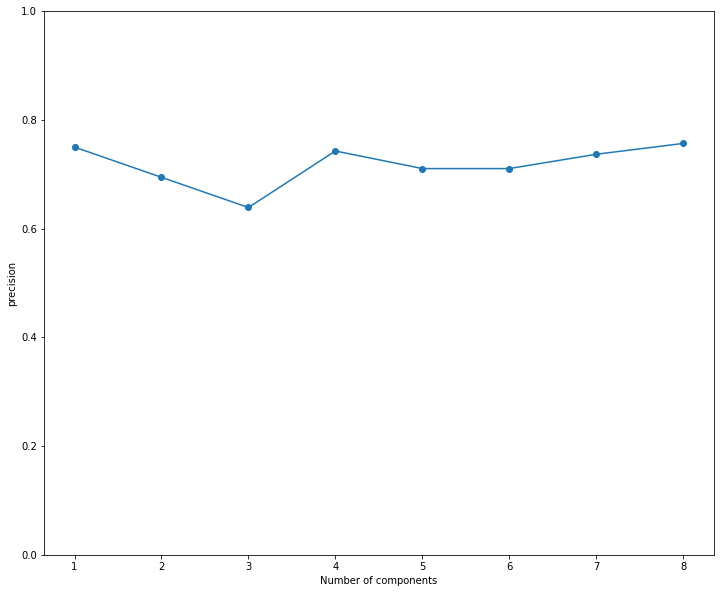

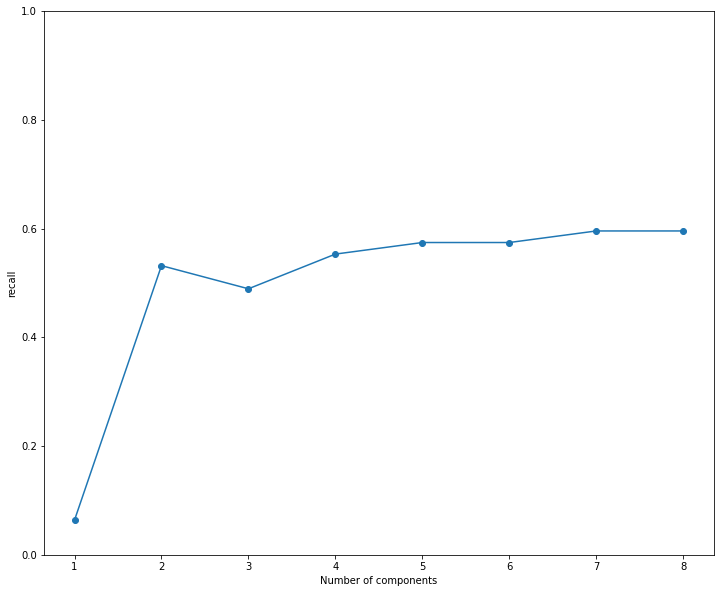

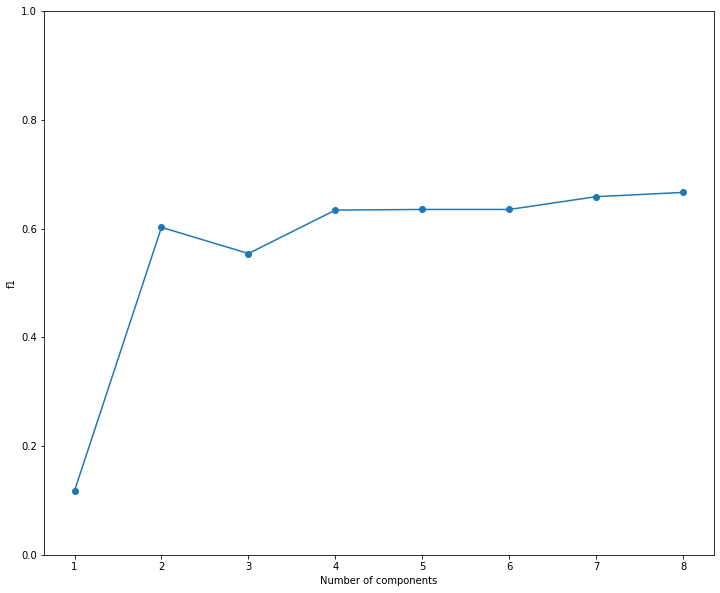

In [43]:
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    visualize_results_kbest(result_dict, metric)

In [44]:
from sklearn.feature_selection import f_classif # ANOVA F-test

def apply_f_classif(x, y, k):
    select_features = SelectKBest(f_classif, k=k)
    X_new = select_features.fit_transform(x, y)
    return pd.DataFrame(X_new, columns=x.columns[select_features.get_support()])

Test: f_classif_1

Accuracy: 0.78
Precision: 0.69
Recall: 0.51
F1: 0.59

Test: f_classif_2

Accuracy: 0.79
Precision: 0.70
Recall: 0.55
F1: 0.62

Test: f_classif_3

Accuracy: 0.80
Precision: 0.72
Recall: 0.55
F1: 0.63

Test: f_classif_4

Accuracy: 0.80
Precision: 0.71
Recall: 0.57
F1: 0.64

Test: f_classif_5

Accuracy: 0.81
Precision: 0.73
Recall: 0.57
F1: 0.64

Test: f_classif_6

Accuracy: 0.81
Precision: 0.73
Recall: 0.57
F1: 0.64

Test: f_classif_7

Accuracy: 0.81
Precision: 0.73
Recall: 0.57
F1: 0.64

Test: f_classif_8

Accuracy: 0.82
Precision: 0.76
Recall: 0.60
F1: 0.67



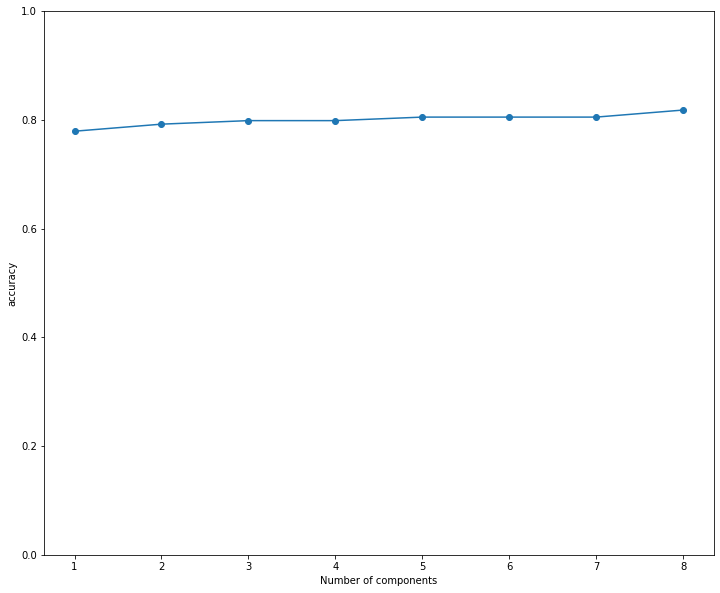

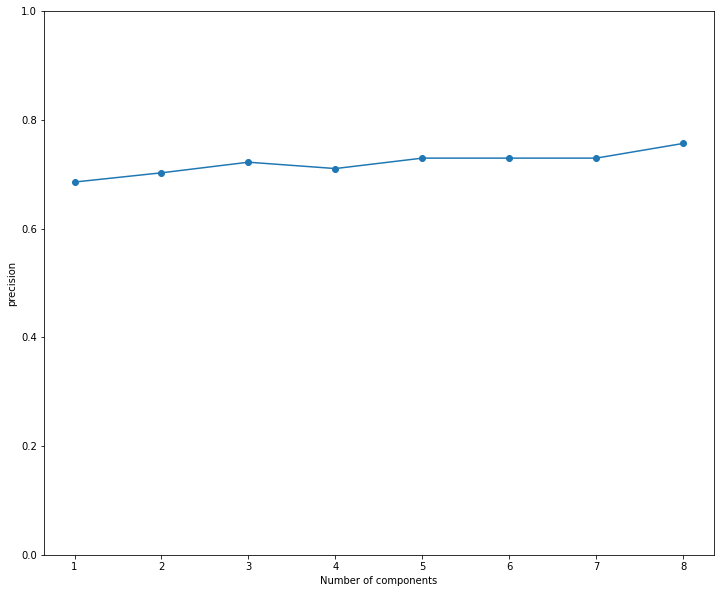

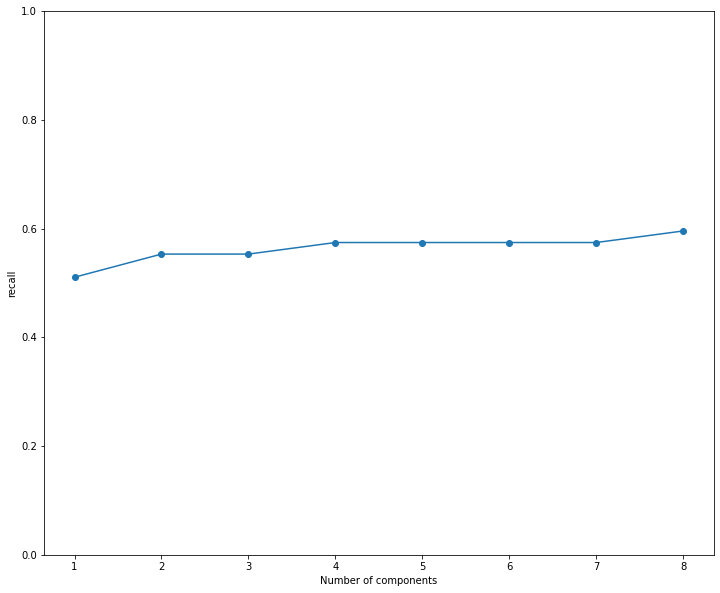

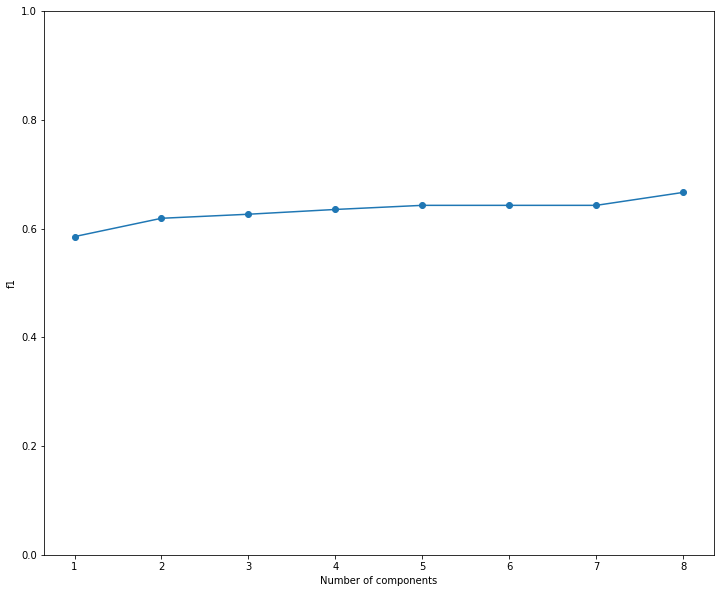

In [45]:
result_dict = {}
for i in range(1, 9):
    result_dict['f_classif_' + str(i)] = build_model('class', FEATURES, diabetes, apply_f_classif, i)

compare_results(result_dict)

for metric in ['accuracy', 'precision', 'recall', 'f1']:
    visualize_results_kbest(result_dict, metric)

In [46]:
from sklearn.feature_selection import mutual_info_classif, SelectPercentile
def apply_mutual_info(x, y, percentile):
    select_features = SelectPercentile(mutual_info_classif, percentile=percentile)
    X_new = select_features.fit_transform(x, y)
    return pd.DataFrame(X_new, columns=x.columns[select_features.get_support()])

In [48]:
def visualize_results_percentile(result_dict, metric):
    n_components = list(range(1, 100, 10))
    logs = [result_dict[key][metric] for key in result_dict]

    plt.figure(figsize=(12, 10))
    plt.plot(n_components, logs, '-o')

    plt.ylim([0, 1])
    plt.xlabel('Percentile')
    plt.ylabel(metric)
    plt.show();

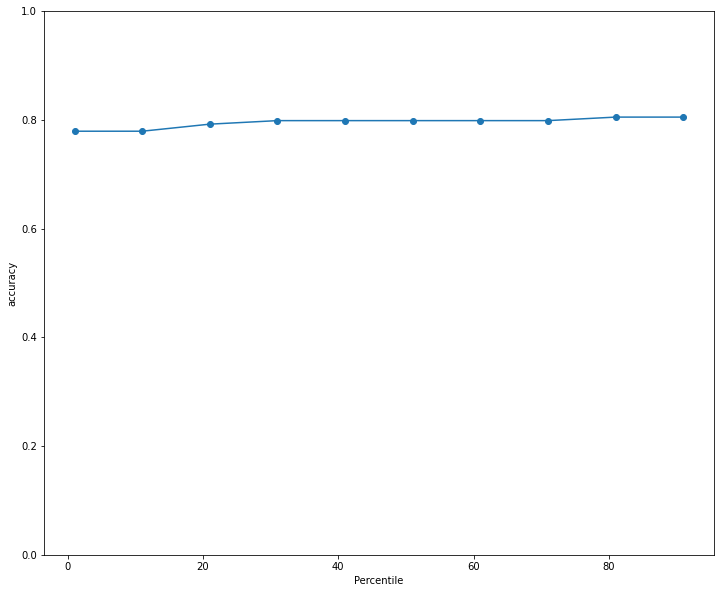

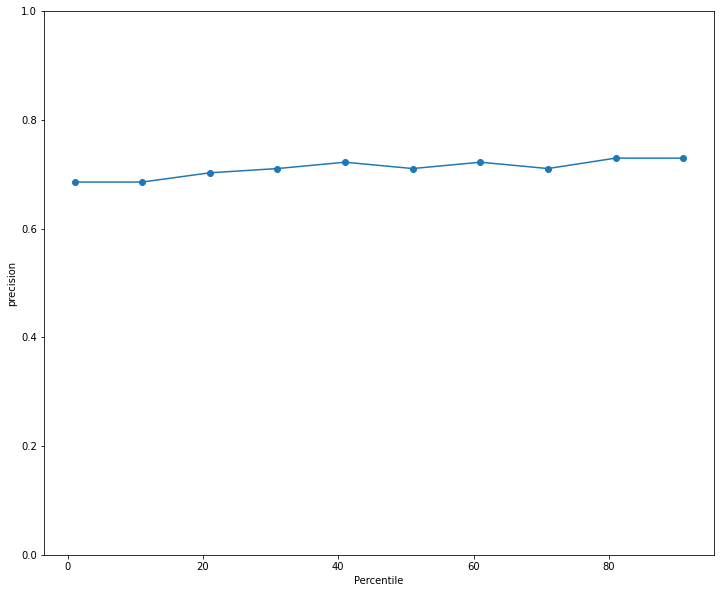

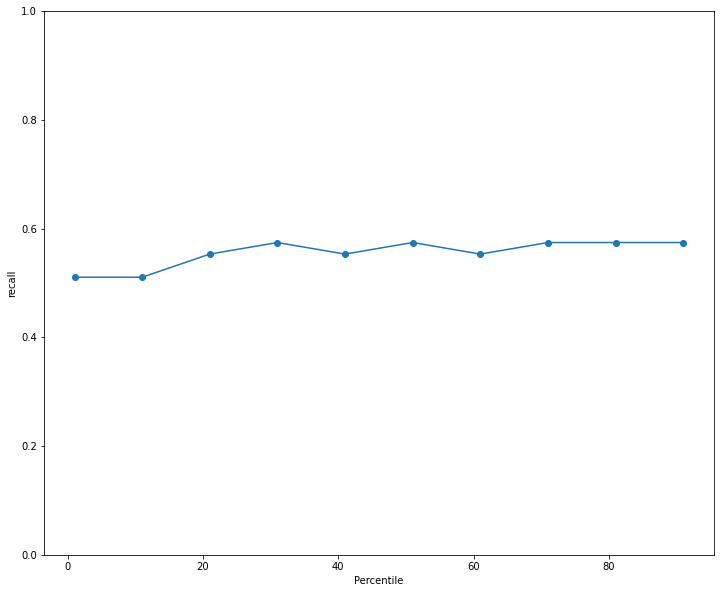

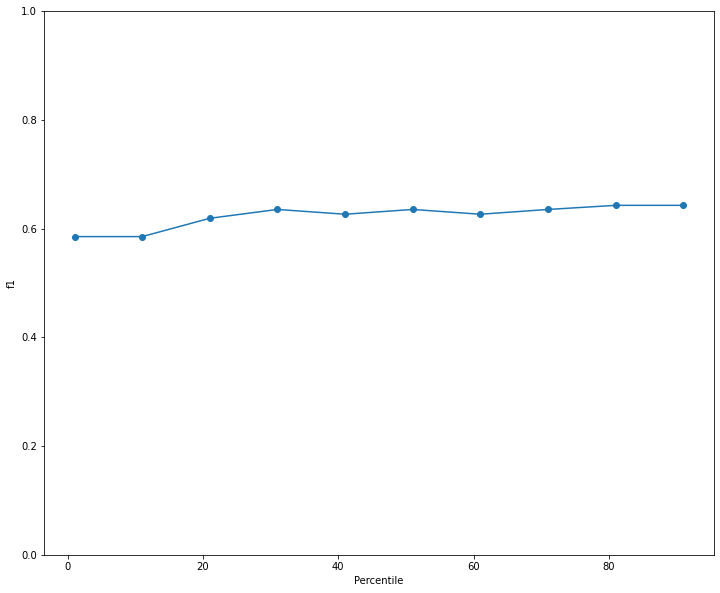

In [49]:
result_dict = {}
for i in range(1, 100, 10):
    result_dict['mutual_info_' + str(i)] = build_model('class', FEATURES, diabetes, apply_mutual_info, i)

for metric in ['accuracy', 'precision', 'recall', 'f1']:
    visualize_results_percentile(result_dict, metric)

# Dictionary Learning

In [50]:
# Dictionary learning can be used to find sparse representations of complex data

In [51]:
from sklearn.datasets import load_digits
digits = load_digits()

In [52]:
digits.data.shape

(1797, 64)

In [64]:
data = digits.data[:40, :]

In [65]:
data.shape

(40, 64)

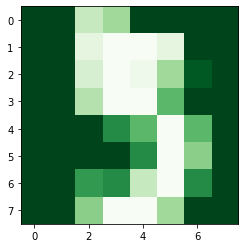

In [66]:
plt.imshow(data[5].reshape(8, 8), cmap='Greens_r', interpolation='nearest')

In [67]:
from sklearn.decomposition import DictionaryLearning
dict_learn = DictionaryLearning(n_components=36, fit_algorithm='lars', transform_algorithm='lasso_lars')

In [68]:
X_dict = dict_learn.fit_transform(data)

In [69]:
X_dict.shape

(40, 36)

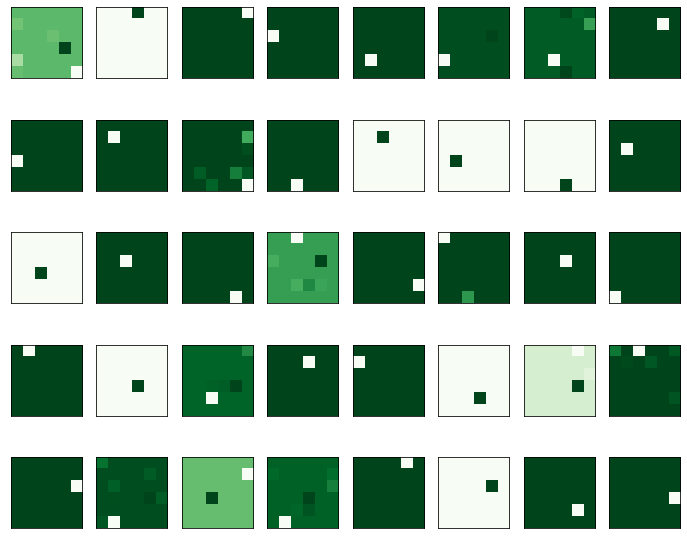

In [70]:
fig = plt.figure(figsize=(12, 10))
for i in range(40):

    ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_dict[i].reshape(6, 6), cmap='Greens_r', interpolation='nearest')

In [71]:
dict_learn.components_.shape

(36, 64)

In [73]:
import numpy as np

original = np.matmul(X_dict, dict_learn.components_)

In [74]:
original.shape

(40, 64)

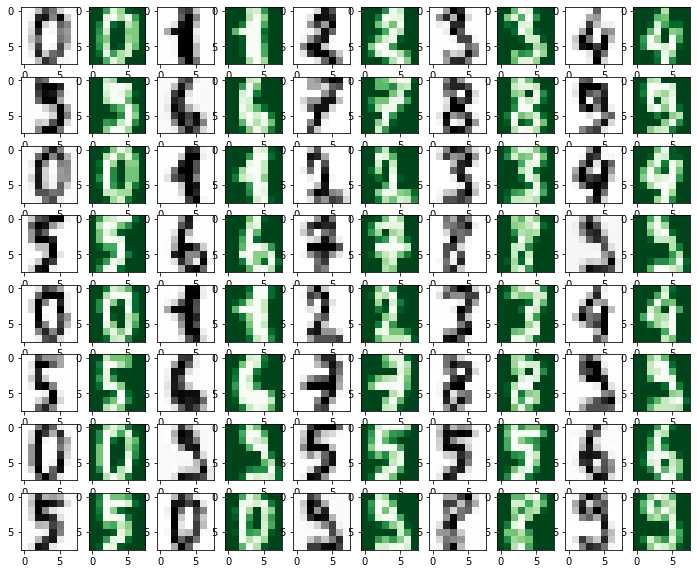

In [76]:
fig = plt.figure(figsize=(12, 10))

a = 0
b = 0

for i in range(80):

    if i%2 == 0:
        ax = plt.subplot(8, 10, i+1)
        ax.imshow(original[a].reshape(8, 8), cmap='Greys')
        a+=1
    else:
        ax = plt.subplot(8, 10, i+1)
        ax.imshow(data[b].reshape(8, 8), cmap='Greens_r')
        b+=1